In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib, glob
import cartopy.crs as ccrs
from scipy.signal import savgol_filter
import string
from cartopy.util import add_cyclic_point
from matplotlib import colors

%run ./get_fixed_variables.ipynb # load plotting functions and fixed vars

In [2]:
## load surface temperature [K]
TS_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_strato.npy')
TS_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_nostrato.npy')
TS_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato.npy')
TS_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_nostrato.npy')

In [3]:
## compute zonal average for each cloud-locking simulation
TSzonal_8xco2_nostrato = np.nanmean(TS_8xco2_nostrato, axis = -1)
TSzonal_8xco2_strato = np.nanmean(TS_8xco2_strato, axis = -1)

TSzonal_1xco2_nostrato = np.nanmean(TS_1xco2_nostrato, axis = -1)
TSzonal_1xco2_strato = np.nanmean(TS_1xco2_strato, axis = -1)

/glade/derecho/scratch/asalazar/tmp/ipykernel_46275/3721108563.py:16: RuntimeWarning: Mean of empty slice
  def yearly_avg(x, year_range): return(np.nanmean(x[-12*year_range:], axis =0 ))
/glade/derecho/scratch/asalazar/tmp/ipykernel_46275/1166509104.py:22: RuntimeWarning: Mean of empty slice
  TSzonal_8xco2_diff_land = np.nanmean(yearly_avg(TS_8xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(TS_8xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land
/glade/derecho/scratch/asalazar/tmp/ipykernel_46275/1166509104.py:23: RuntimeWarning: Mean of empty slice
  TSzonal_1xco2_diff_land = np.nanmean(yearly_avg(TS_1xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(TS_1xco2_strato*LANDMASK,year_to_avg), axis = -1)


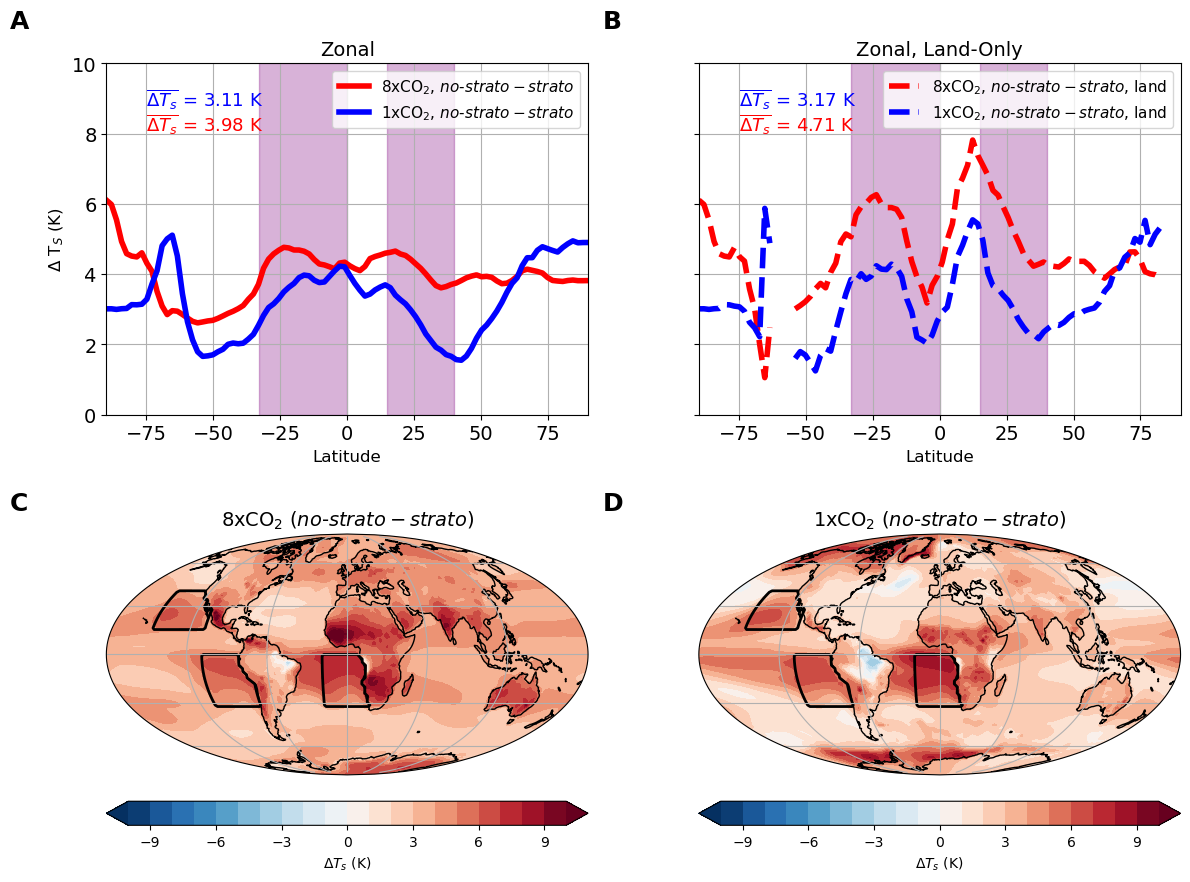

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec


year_to_avg = 10 # years to average 

TSzonal_8xco2_diff = yearly_avg(TSzonal_8xco2_nostrato,year_to_avg) - yearly_avg(TSzonal_8xco2_strato,year_to_avg) # difference between nostrato and strato, 8xco2
TSzonal_1xco2_diff = yearly_avg(TSzonal_1xco2_nostrato,year_to_avg) - yearly_avg(TSzonal_1xco2_strato,year_to_avg) # difference between nostrato and strato, 1xco2

TSglobal_8xco2_diff = yearly_avg(TS_8xco2_nostrato, year_to_avg)-yearly_avg(TS_8xco2_strato,year_to_avg)
TSglobal_1xco2_diff = yearly_avg(TS_1xco2_nostrato, year_to_avg)-yearly_avg(TS_1xco2_strato,year_to_avg)

TSglobal_8xco2_diff_new, lons = add_cyclic_point(TSglobal_8xco2_diff, coord = lon)
TSglobal_1xco2_diff_new, lons = add_cyclic_point(TSglobal_1xco2_diff, coord = lon)
strato_mask_new, lons = add_cyclic_point(strato_mask, coord = lon)

mean_diff_1xco2 = np.nansum(TSzonal_1xco2_diff*gw)/(np.sum(gw)) # calculate global mean difference
mean_diff_8xco2 = np.nansum(TSzonal_8xco2_diff*gw)/(np.sum(gw))

TSzonal_8xco2_diff_land = np.nanmean(yearly_avg(TS_8xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(TS_8xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land
TSzonal_1xco2_diff_land = np.nanmean(yearly_avg(TS_1xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(TS_1xco2_strato*LANDMASK,year_to_avg), axis = -1)
mean_diff_1xco2_land = np.nansum(TSzonal_1xco2_diff_land*gw)/(np.sum(gw)) # calculate global mean difference
mean_diff_8xco2_land = np.nansum(TSzonal_8xco2_diff_land*gw)/(np.sum(gw))

fig = plt.figure(figsize=(12, 9), tight_layout=True)
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5])

# Plot 1: Zonal average plot on a Cartesian grid (8xCO2 vs 1xCO2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(lat, TSzonal_8xco2_diff, 'r', linewidth=4, label='8xCO$_2$, $\\it{no}$-$\\it{strato} - \\it{strato}$')
ax1.plot(lat, TSzonal_1xco2_diff, 'b', linewidth=4, label='1xCO$_2$, $\\it{no}$-$\\it{strato} - \\it{strato}$')
ax1.legend(fontsize=11, loc='upper right')
ax1.grid()
ax1.set_title('Zonal', fontsize=14)
ax1.set_ylabel('$\Delta$ T$_S$ (K)', fontsize=12)
ax1.set_xlabel('Latitude', fontsize=12)
ax1.set_ylim(0, 10)
ax1.set_xlim(-90, 90)
ax1.axvspan(-33, 0, alpha=0.3, color='purple')
ax1.axvspan(15, 40, alpha=0.3, color='purple')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.text(-75, 8.8, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_1xco2,2)) + ' K', color = 'b', fontsize = 13)
ax1.text(-75, 8.1, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_8xco2,2)) + ' K', color = 'r', fontsize = 13)

# Plot 2: Zonal average over land (Cartesian grid)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(lat, TSzonal_8xco2_diff_land, 'r--', linewidth=4, label='8xCO$_2$, $\\it{no}$-$\\it{strato} - \\it{strato}$, land')
ax2.plot(lat, TSzonal_1xco2_diff_land, 'b--', linewidth=4, label='1xCO$_2$, $\\it{no}$-$\\it{strato} - \\it{strato}$, land')
ax2.legend(fontsize=11, loc='upper right')
ax2.grid()
ax2.set_xlabel('Latitude', fontsize=12)
ax2.set_ylim(0, 10)
ax2.set_xlim(-90, 90)
ax2.set_title('Zonal, Land-Only', fontsize=14)
ax2.axvspan(-33, 0, alpha=0.3, color='purple')
ax2.axvspan(15, 40, alpha=0.3, color='purple')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(labelleft=False)
ax2.text(-75, 8.8, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_1xco2_land,2))+ ' K', color = 'b', fontsize = 13)
ax2.text(-75, 8.1, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_8xco2_land,2))+ ' K', color = 'r', fontsize = 13)


# Now create the contour plots using Mollweide projection
# Plot 3: Contour plot for global 8xCO2 TS Difference (Mollweide projection)
ax3 = fig.add_subplot(gs[1, 0], projection=ccrs.Mollweide(central_longitude=0))
cf_8xco2 = ax3.contourf(lons, lat, TSglobal_8xco2_diff_new, levels=np.linspace(-10,10,21),transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')
ax3.coastlines()
ax3.set_title('8xCO$_2$ ($\it{no}$-$\it{strato}-\it{strato}$)', fontsize=14)
cbar_8xco2 = fig.colorbar(cf_8xco2, ax=ax3, orientation='horizontal', pad=0.05, label = '$\Delta T_s$ (K)')
ax3.contour(lons,lat, strato_mask_new,[0.5], cmap = 'gray',linewidths=2,transform=ccrs.PlateCarree())
# Plot 4: Contour plot for global 1xCO2 TS Difference (Mollweide projection)
ax4 = fig.add_subplot(gs[1, 1], projection=ccrs.Mollweide(central_longitude=0))
cf_1xco2 = ax4.contourf(lons, lat, TSglobal_1xco2_diff_new, levels=np.linspace(-10,10,21),transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')
ax4.coastlines()
ax4.set_title('1xCO$_2$ ($\it{no}$-$\it{strato}-\it{strato}$)', fontsize=14)
cbar_1xco2 = fig.colorbar(cf_1xco2, ax=ax4, orientation='horizontal', pad=0.05, label = '$\Delta T_s$ (K)')
ax4.contour(lons,lat, strato_mask_new,[0.5], cmap = 'gray',linewidths=2,transform=ccrs.PlateCarree())
# Add gridlines to both Mollweide plots
for axis in [ax3, ax4]:
    axis.gridlines()


ax1.annotate('A', xy=(-0.2, 1.1), xycoords="axes fraction",fontsize=18, weight = 'bold')
ax2.annotate('B', xy=(-0.2, 1.1), xycoords="axes fraction",fontsize=18, weight = 'bold')
ax3.annotate('C', xy=(-0.2, 1.1), xycoords="axes fraction",fontsize=18, weight = 'bold')
ax4.annotate('D', xy=(-0.2, 1.1), xycoords="axes fraction",fontsize=18, weight = 'bold')

plt.savefig('./Figure_PDFs/Figure_4.pdf', bbox_inches='tight')
plt.show()
